# Analysis of the condition media experiments
---

## 0. Environmental setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from scipy.stats import pearsonr

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn import mixture
import itertools

---
## 1. Read in data

### 1.1. gH2AX - 02/25/21

In [6]:
root_dir = "../data/tcells_sample1/all_features/"

dapi_gh2ax_lamin_02_features_2d = pd.read_csv(root_dir+"tcells_dapi_gh2ax_lamina_02_features_2d.csv", index_col=0)
dapi_gh2ax_lamin_02_features_3d = pd.read_csv(root_dir+"tcells_dapi_gh2ax_lamina_02_features_3d.csv", index_col=0)

dapi_gh2ax_lamin_02_features = dapi_gh2ax_lamin_02_features_2d.join(dapi_gh2ax_lamin_02_features_3d, rsuffix="_3d")
dapi_gh2ax_lamin_02_features["sample"] = np.repeat("dapi_gh2ax_lamin_02", len(dapi_gh2ax_lamin_02_features))
dapi_gh2ax_lamin_02_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int,sample
DAPI_Lamin_gH2AX_12bit_500Zstep_1_0,0.022714,0.074956,68,0.153825,0.068655,0.067891,0.035763,9.955047,145,0.220481,...,7.179662,2.434633,1.071118,0.671048,0.0,0.429605,0.951268,7.179665,2.434633,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_1,0.029694,0.036822,41,0.128911,0.051858,0.040807,0.022980,6.015540,116,0.058785,...,175.620151,7.412156,0.983486,0.716846,0.0,0.623686,0.883556,175.620175,7.412157,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_2,0.026996,0.036939,43,0.112288,0.049467,0.042471,0.022499,6.034969,122,0.066281,...,378.804273,12.185849,0.888192,0.690890,0.0,0.451298,0.736328,378.804390,12.185849,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_3,0.028671,0.034926,51,0.102207,0.046874,0.037563,0.020296,6.187412,132,0.089717,...,41.598064,4.320794,0.956563,0.807882,0.0,0.439015,0.671435,41.598060,4.320793,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_4,0.027932,0.033798,60,0.098052,0.047023,0.037563,0.023100,5.877884,125,0.067891,...,23.895500,3.306564,1.030067,0.749616,0.0,0.452792,0.830119,23.895498,3.306564,dapi_gh2ax_lamin_02


### 1.2. HP1 - 02/25/21

In [7]:
dapi_hp1_lamin_02_features_2d = pd.read_csv(root_dir+"tcells_dapi_hp1_lamina_02_features_2d.csv", index_col=0)
dapi_hp1_lamin_02_features_3d = pd.read_csv(root_dir+"tcells_dapi_hp1_lamina_02_features_3d.csv", index_col=0)

dapi_hp1_lamin_02_features = dapi_hp1_lamin_02_features_2d.join(dapi_hp1_lamin_02_features_3d, rsuffix="_3d")
dapi_hp1_lamin_02_features["sample"] = np.repeat("dapi_hp1_lamin_02", len(dapi_hp1_lamin_02_features))
dapi_hp1_lamin_02_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int,sample
Tcells_DAPI_Lamin_HP1_1_0,0.027963,0.035846,56,0.102207,0.048837,0.039185,0.020368,6.153439,126,0.098052,...,8.199746,2.698066,1.003177,0.903298,0.0,0.420927,0.679043,8.199746,2.698066,dapi_hp1_lamin_02
Tcells_DAPI_Lamin_HP1_1_1,0.026112,0.046726,59,0.127626,0.057000,0.058785,0.024064,7.125061,125,0.125562,...,124.701388,5.817989,1.028489,0.764040,0.0,0.341678,0.801176,124.701407,5.817991,dapi_hp1_lamin_02
Tcells_DAPI_Lamin_HP1_1_2,0.028937,0.037276,52,0.127626,0.049837,0.040807,0.023851,6.129906,123,0.079597,...,7.685088,2.608703,1.089041,0.881893,0.0,0.430226,0.823443,7.685087,2.608703,dapi_hp1_lamin_02
Tcells_DAPI_Lamin_HP1_1_3,0.025792,0.038999,64,0.112288,0.050895,0.047379,0.021397,6.514605,128,0.079597,...,9.280935,2.843245,1.111051,0.829642,0.0,0.318417,0.887019,9.280935,2.843245,dapi_hp1_lamin_02
Tcells_DAPI_Lamin_HP1_1_4,0.030219,0.059248,113,0.220481,0.061732,0.050076,0.037256,13.334201,216,0.198763,...,110.548689,9.096602,0.436883,0.575424,0.0,0.147327,0.272754,110.548691,9.096600,dapi_hp1_lamin_02


----

### 1.3 HP1 - 03/26/21

In [8]:
dapi_hp1_lamin_03_features_2d = pd.read_csv(root_dir+"tcells_dapi_hp1_lamina_03_features_2d.csv", index_col=0)
dapi_hp1_lamin_03_features_3d = pd.read_csv(root_dir+"tcells_dapi_hp1_lamina_03_features_3d.csv", index_col=0)

dapi_hp1_lamin_03_features = dapi_hp1_lamin_03_features_2d.join(dapi_hp1_lamin_03_features_3d, rsuffix="_3d")
dapi_hp1_lamin_03_features["sample"] = np.repeat("dapi_hp1_lamin_03", len(dapi_hp1_lamin_03_features))
dapi_hp1_lamin_03_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,kurtosis_lamina_int,skewness_lamina_int,normalized_mean_lamina_int,normalized_std_lamina_int,normalized_q25_lamina_int,normalized_q75_lamina_int,normalized_median_lamina_int,normalized_kurtosis_lamina_int,normalized_skewness_lamina_int,sample
1_0,0.024830,0.035810,70,0.121212,0.045434,0.037563,0.020572,6.451673,142,0.098052,...,10.587673,2.921008,1.173976,0.816595,0.0,0.342071,0.961057,10.587672,2.921008,dapi_hp1_lamin_03
1_1,0.026286,0.040047,64,0.157067,0.046884,0.037563,0.026317,6.376159,136,0.119406,...,10.329217,2.925490,1.078825,0.881598,0.0,0.369201,0.808726,10.329215,2.925490,dapi_hp1_lamin_03
1_2,0.026976,0.051666,58,0.128911,0.057274,0.054669,0.027475,7.216510,126,0.153764,...,10.180997,2.763548,1.123713,0.860438,0.0,0.380507,0.897997,10.180995,2.763548,dapi_hp1_lamin_03
1_3,0.025429,0.048518,67,0.112288,0.054609,0.047379,0.023833,7.044573,129,0.173950,...,1509.581107,30.963745,0.536726,0.547342,0.0,0.185582,0.417560,1509.580985,30.963737,dapi_hp1_lamin_03
1_4,0.024833,0.033081,98,0.103945,0.045230,0.037563,0.020469,6.151331,136,0.067891,...,33.696470,4.098858,0.957929,0.860894,0.0,0.347828,0.695656,33.696475,4.098858,dapi_hp1_lamin_03


### 1.4 All data

In [9]:
all_data = dapi_gh2ax_lamin_02_features.append(dapi_hp1_lamin_02_features).append(dapi_hp1_lamin_03_features)
all_data.describe()
sample_labels = all_data.loc[:, "sample"]
sample_changes = list(Counter(sample_labels).values())

---

## 2. Data preprocessing

We will now preprocess the data for the downstream analyses.

### 2.1. Remove constant and NA samples

In [10]:
# Remove constant features for control data
cleaned_all_data = all_data.loc[:, (all_data != all_data.iloc[0]).any()]
cleaned_all_data = cleaned_all_data.dropna(axis=1, how='all')
# Remove rows with missing entries in the control data
cleaned_all_data = cleaned_all_data.dropna(axis=0)
print("{} rows and {} columns were dropped for the control data.".format(str(len(all_data)-len(cleaned_all_data)), str(len(all_data.columns)-len(cleaned_all_data.columns))))

16 rows and 8 columns were dropped for the control data.


### 2.2. Remove highly correlated features


In [11]:
# Maintain features that have at most a Pearson correlation of 0.75
threshold = 0.70

# Control data
all_data_corr_matrix = cleaned_all_data.corr().abs()
upper = all_data_corr_matrix.where(np.triu(np.ones(all_data_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] + ["label"] +["bbox-1"] + ["sample"]
len(to_drop)

211

We drop 214 of the features that show a high autocorrelation (larger than 0.7) plus 2 that are artifacts from the segmentation.

In [12]:
cleaned_all_data = cleaned_all_data.drop(to_drop, axis=1)
cleaned_all_data.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Len_posi_Curvature,num_prominant_positive_curvature,width_prominant_positive_curvature,num_prominant_negative_curvature,width_prominant_negative_curvature,Min_Calliper,Std_Radius,...,rdp_1,q25_dapi_int,q75_dapi_int,rel_lamina_int,min_lamina_int,max_lamina_int,q25_lamina_int,kurtosis_lamina_int,normalized_std_lamina_int,normalized_q75_lamina_int
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.026009,0.040847,64.259907,130.462704,5.458042,8.502963,4.412587,7.343756,65.656177,2.414480,...,0.009477,0.029138,359.171037,145.293467,3.201632,1325.269231,0.009324,257.284000,0.826485,0.291759
std,0.002009,0.009456,11.884952,9.648508,1.923566,2.021405,1.982403,1.532277,5.787119,1.377793,...,0.010035,0.211323,150.792511,174.504672,14.960318,1038.257304,0.159950,590.734314,0.130178,0.101127
min,0.012677,0.024161,37.000000,107.000000,1.000000,5.150085,1.000000,5.024104,48.000000,0.422083,...,0.000015,0.000000,70.000000,5.855590,0.000000,64.000000,0.000000,4.616407,0.271356,0.000000
25%,0.024861,0.034391,56.000000,125.000000,4.000000,7.167650,3.000000,6.278550,61.250000,1.539479,...,0.002567,0.000000,248.000000,36.414677,0.000000,598.000000,0.000000,10.663319,0.762678,0.231058
50%,0.026097,0.039413,63.000000,130.000000,5.000000,8.162671,4.000000,7.079859,66.000000,2.125099,...,0.006329,0.000000,335.000000,91.311564,0.000000,998.000000,0.000000,15.766514,0.830830,0.299174
75%,0.027383,0.045246,72.000000,136.000000,7.000000,9.428863,6.000000,8.035758,69.000000,2.943038,...,0.012479,0.000000,444.750000,185.291509,0.000000,1681.000000,0.000000,150.886557,0.893258,0.355168
max,0.031637,0.090725,113.000000,216.000000,14.000000,25.493064,11.000000,15.612446,85.000000,17.627237,...,0.061220,3.000000,976.000000,1467.156018,203.000000,4095.000000,3.000000,5360.392564,1.496243,0.623686


In [13]:
np.unique(cleaned_all_data.columns)

array(['Avg_Curvature', 'Center_Mismatch', 'Entropy',
       'Frac_Peri_w_posi_curvature', 'I80_I20', 'Int_Min', 'Int_d25',
       'Len_posi_Curvature', 'Min_Calliper', 'Std_Curvature',
       'Std_Radius', 'correlation_1', 'equivalent_diameter_3d', 'extent',
       'kurtosis_lamina_int', 'max_lamina_int', 'min_lamina_int',
       'moments_central-0-1', 'moments_central-1-0', 'nHigh_nLow',
       'nPolarity_changes', 'normalized_q75_lamina_int',
       'normalized_std_lamina_int', 'nuclear_mean_int',
       'num_prominant_negative_curvature',
       'num_prominant_positive_curvature', 'orientation', 'q25_dapi_int',
       'q25_lamina_int', 'q75_dapi_int', 'rdp_1', 'rel_lamina_int',
       'solidity', 'weighted_moments_central-0-1',
       'weighted_moments_central-1-0', 'weighted_moments_hu-2',
       'weighted_moments_hu-3', 'weighted_moments_hu-6',
       'weighted_moments_normalized-0-2',
       'weighted_moments_normalized-0-3',
       'weighted_moments_normalized-1-1',
       'wei

---

## 3. Data visualization

We will now visualize the cleaned data that consists of 42 features after our filtering and 864 samples.

### 3.1. tSNE visualization

In [28]:
random.seed(1234)
tsne = TSNE(n_components=2, perplexity=40, random_state=1234)
scaled_cleaned_all_data = StandardScaler().fit_transform(cleaned_all_data)
tsne_embedded_cleaned_data = tsne.fit_transform(scaled_cleaned_all_data)

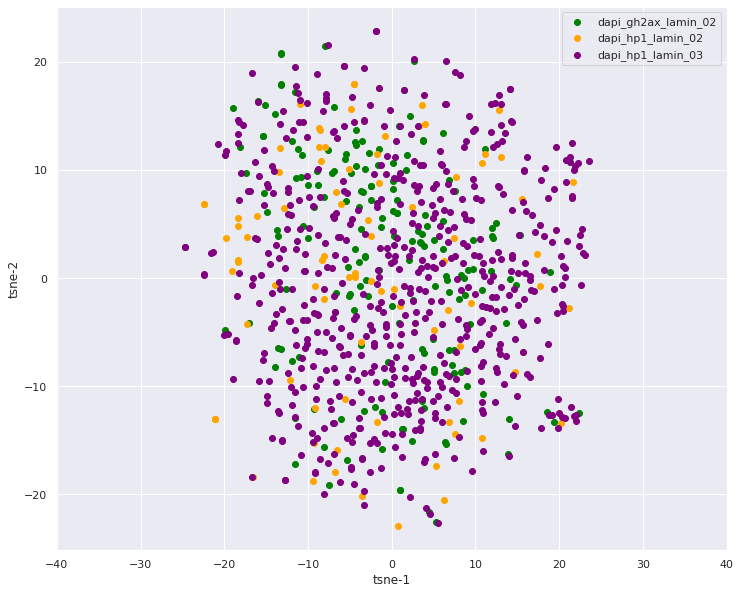

In [29]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = tsne_embedded_cleaned_data[:,0]
y = tsne_embedded_cleaned_data[:,1]
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
colors = ["green", "orange","purple"]
j = 0
for i in range(len(sample_changes)):
    end = j + sample_changes[i]
    scatter = ax.scatter(x[j:end], y[j:end], c=colors[i], label=np.unique(sample_labels)[i])
    j = end
ax.set_xlim([-40,40])
ax.legend()
plt.show()

### 3.2. PCA visualization

In [26]:
pca = PCA(n_components=2, random_state=1234)
pca_embedded_cleaned_data = pca.fit_transform(scaled_cleaned_all_data)
expl_var_ratio = pca.explained_variance_ratio_

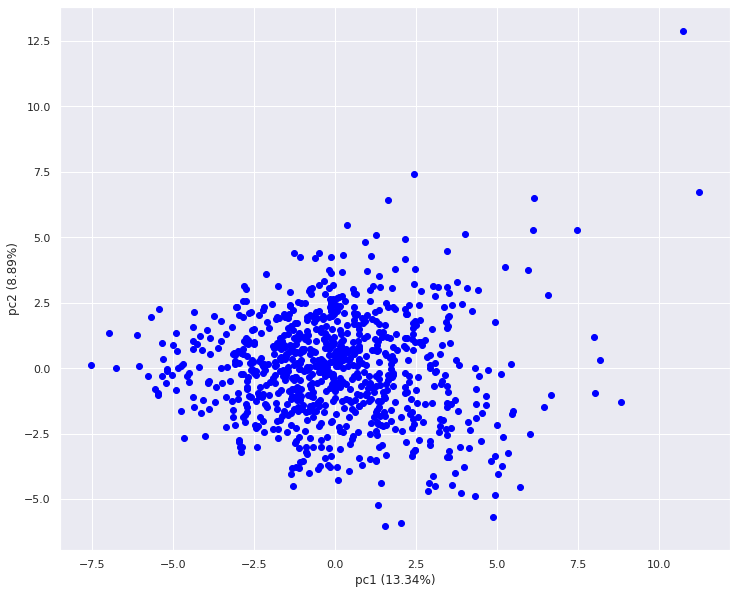

In [27]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = pca_embedded_cleaned_data[:,0]
y = pca_embedded_cleaned_data[:,1]
ax.set_xlabel("pc1 ({}%)".format(np.round(expl_var_ratio[0]*100,2)))
ax.set_ylabel("pc2 ({}%)".format(np.round(expl_var_ratio[1]*100,2)))

scatter = ax.scatter(x,y, c="blue")
plt.show()

---

## 4. Heterogeneity in the population

We will now assess how dissimilar the treatment and the control condition samples are.

### 4.1. Cluster analysis

We perform a Gaussian mixture modelling cluster analysis.

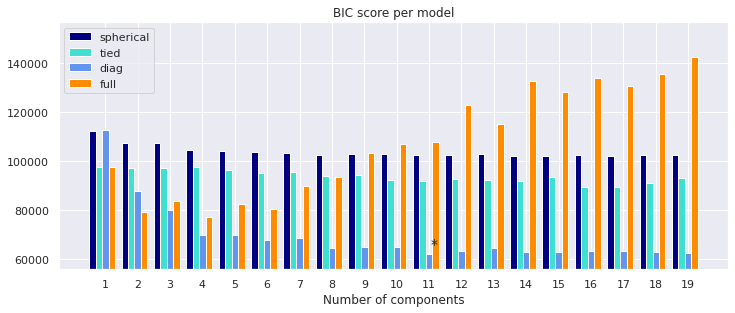

In [37]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(scaled_cleaned_all_data)
        bic.append(gmm.bic(scaled_cleaned_all_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(12, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 0.9, bic.max()*1.1])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [38]:
print(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')

Selected GMM: diag model, 11 components


We see that the GMM model with lowest BIC for the data takes two components and a full covariance structures.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

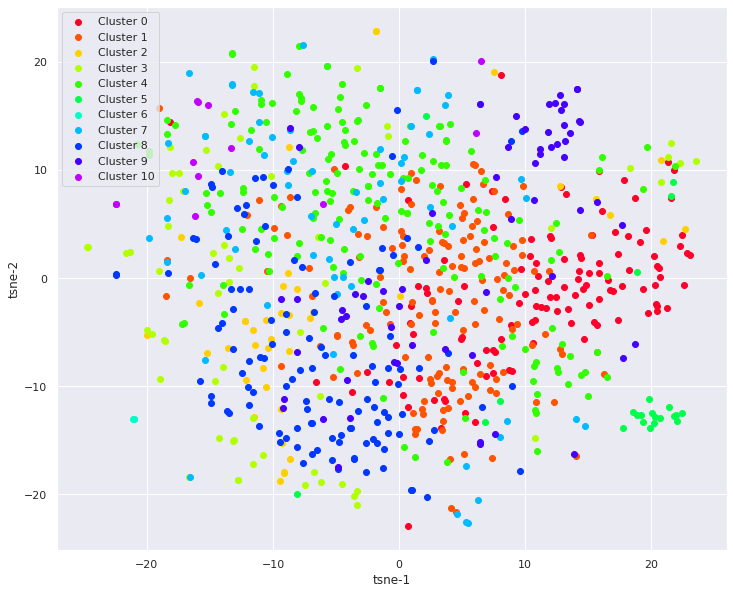

In [42]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = tsne_embedded_cleaned_data[:,0]
y = tsne_embedded_cleaned_data[:,1]
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")

labels = best_gmm.predict(scaled_cleaned_all_data)
cm = plt.get_cmap('gist_rainbow')
cs = np.vectorize(colors.get)(labels)

for label in list(np.unique(labels)):
    scatter = ax.scatter(x[labels == label], y[labels==label], c=cm(label/len(np.unique(labels))), label="Cluster {}".format(label))
ax.legend()
plt.show()

In [67]:
cluster_means = []
for cluster_label in list(np.unique(labels)):
    cluster_means.append(np.mean(scaled_cleaned_all_data[labels == cluster_label], axis=0))
cluster_means = np.array(cluster_means)

In [68]:
cluster_means = pd.DataFrame(cluster_means, index=["Cluster {}".format(i) for i in list(np.unique(labels))], columns=cleaned_all_data.columns)

In [69]:
cluster_means

,Avg_Curvature,Std_Curvature,nPolarity_changes,Len_posi_Curvature,num_prominant_positive_curvature,width_prominant_positive_curvature,num_prominant_negative_curvature,width_prominant_negative_curvature,Min_Calliper,Std_Radius,...,rdp_1,q25_dapi_int,q75_dapi_int,rel_lamina_int,min_lamina_int,max_lamina_int,q25_lamina_int,kurtosis_lamina_int,normalized_std_lamina_int,normalized_q75_lamina_int
Cluster 0,0.803578,-0.720067,-0.138772,-0.133689,-0.775627,-0.286445,-0.779720,-0.261756,-0.236338,-0.557075,...,0.056478,-0.137962,0.469177,-0.503125,-0.214133,0.180098,-0.058327,0.533979,0.102686,-0.442007
Cluster 1,0.414773,-0.214293,-0.147893,-0.245355,-0.043616,-0.039525,-0.146376,-0.113701,-0.092258,-0.455668,...,-0.220139,-0.137962,0.169387,-0.198328,-0.214133,-0.466685,-0.058327,-0.406813,0.396551,0.340756
Cluster 2,-1.448350,-0.135875,1.175246,0.885347,0.104292,-0.431821,0.259555,-0.323756,1.311905,-0.064676,...,1.470203,-0.137962,-0.926180,0.212406,0.247519,0.722667,-0.058327,0.540394,-0.579034,-0.860013
Cluster 3,-0.754441,0.691248,0.254740,0.559422,0.323194,0.021472,0.376602,0.188839,0.210389,0.758158,...,-0.101186,-0.137962,-0.400344,-0.323868,-0.214133,0.313636,-0.058327,0.747184,0.124886,-0.556103
Cluster 4,0.264543,0.423692,-0.573941,-0.501332,0.330233,0.250903,0.401294,0.225217,-0.439408,0.112776,...,-0.290688,-0.137962,0.129182,-0.516687,-0.214133,-0.379958,-0.058327,0.157322,-0.012942,-0.007688
Cluster 5,0.739501,-0.309165,-0.479431,-0.377130,-0.373957,-0.179735,-0.449640,-0.058654,-0.556974,-0.381672,...,-0.221665,5.008606,1.745660,-0.152008,-0.170514,-0.078530,-0.058327,0.560185,0.441271,0.723232
Cluster 6,-0.412004,0.153528,0.202623,0.747076,0.281911,0.684257,0.296486,-0.227889,0.866305,-0.473253,...,1.169923,-0.137962,0.018772,3.939918,7.945530,2.342530,16.623305,-0.416837,-1.224440,1.209412
Cluster 7,-0.220754,0.278122,-0.156831,-0.020533,-0.100568,0.674916,0.007007,0.374713,-0.649945,0.993417,...,-0.077766,-0.137962,-0.331324,0.194760,-0.004634,-0.255502,-0.058327,-0.415930,-0.019905,0.215742
Cluster 8,-0.785504,-0.077093,0.732426,0.449625,0.265131,-0.262885,0.186585,-0.054357,0.904417,-0.117137,...,0.113265,-0.137962,-0.307879,0.277522,-0.214133,-0.004682,-0.058327,-0.412883,-0.281655,0.116395
Cluster 9,0.071205,-0.279746,0.077850,0.095605,-0.238260,-0.123997,-0.239307,-0.134372,0.078066,-0.222061,...,0.337993,-0.137962,-0.224343,2.067397,1.587578,1.063295,-0.058327,-0.419941,-0.309774,0.449544


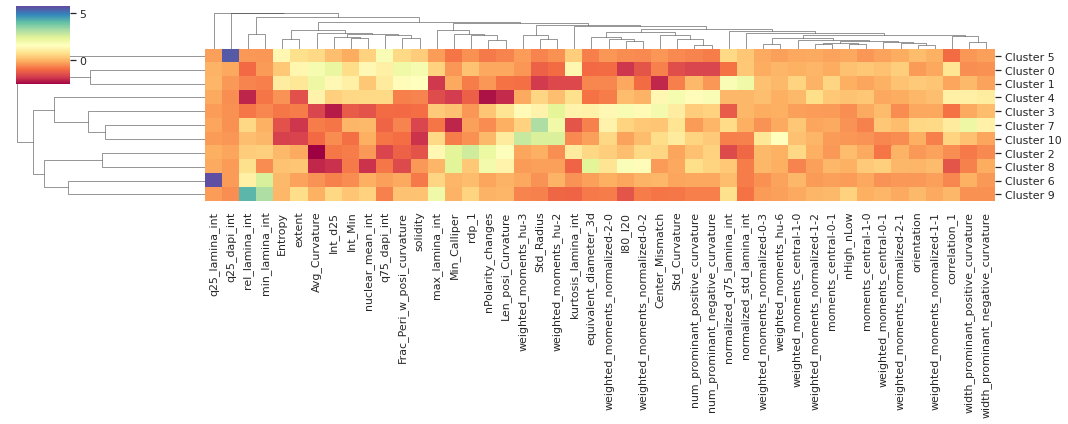

In [92]:
g = sns.clustermap(cluster_means, z_score=0, row_cluster=True, figsize=[15,6], cmap="Spectral")

In [103]:
cluster_label_samples = pd.DataFrame(labels, columns=["cluster_label"], index=cleaned_all_data.index)
cluster_label_samples["sample"] = sample_labels

In [104]:
cluster_label_samples

,cluster_label,sample
DAPI_Lamin_gH2AX_12bit_500Zstep_1_0,8,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_1,0,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_2,0,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_3,4,dapi_gh2ax_lamin_02
DAPI_Lamin_gH2AX_12bit_500Zstep_1_4,4,dapi_gh2ax_lamin_02
...,...,...
87_2,1,dapi_hp1_lamin_03
87_3,4,dapi_hp1_lamin_03
87_4,0,dapi_hp1_lamin_03
87_5,1,dapi_hp1_lamin_03


In [124]:

cluster_distributions = {}
for sample in list(np.unique(sample_labels)):
    label_counts = Counter(list(cluster_label_samples.loc[cluster_label_samples["sample"] == sample,"cluster_label"]))
    cluster_distributions[sample] = (dict(label_counts))
    

In [148]:
Counter(sample_labels)

Counter({'dapi_gh2ax_lamin_02': 180,
         'dapi_hp1_lamin_02': 88,
         'dapi_hp1_lamin_03': 606})

In [133]:
cdis_pd = np.zeros([3,11])
unique_sample_labels = list(np.unique(sample_labels))
for i in range(3):
    sample = unique_sample_labels[i]
    label_counts = Counter(list(cluster_label_samples.loc[cluster_label_samples["sample"] == sample,"cluster_label"]))
    for j in range(11):
        cdis_pd[i,j] = label_counts[j]
cdis_pd = pd.DataFrame(cdis_pd, columns=list(range(11)), index=unique_sample_labels)

<AxesSubplot:ylabel='dapi_gh2ax_lamin_02'>

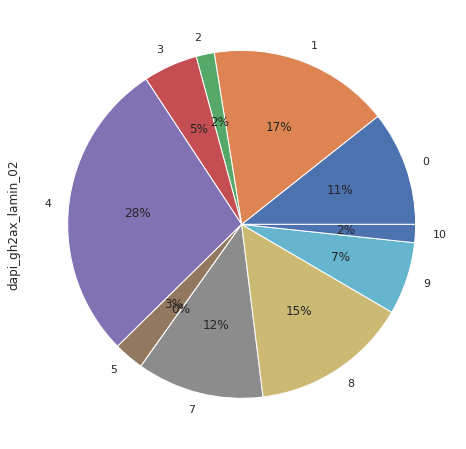

In [143]:
plt.figure(figsize=[8,8])
cdis_pd.iloc[0,:].plot.pie(autopct="%.0f%%")

<AxesSubplot:ylabel='dapi_hp1_lamin_02'>

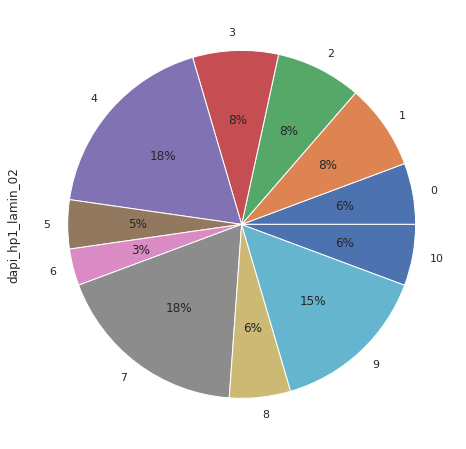

In [146]:
plt.figure(figsize=[8,8])
cdis_pd.iloc[1,:].plot.pie(autopct="%.0f%%")

<AxesSubplot:ylabel='dapi_hp1_lamin_03'>

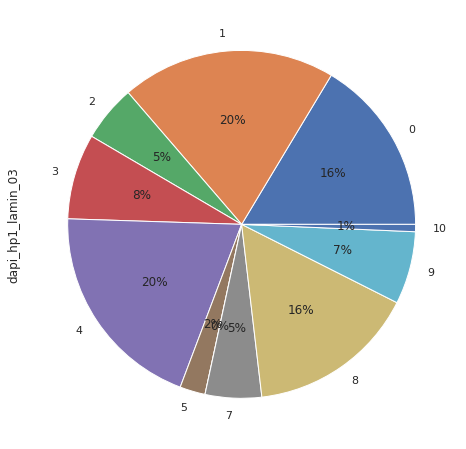

In [147]:
plt.figure(figsize=[8,8])
cdis_pd.iloc[2,:].plot.pie(autopct="%.0f%%")

### 4.2. Special features of interest

We now plot the distribution for specific pre-selected features of special interest.

In [60]:
set(all_data.columns)

{'ASM_1',
 'ASM_20',
 'ASM_5',
 'A_R',
 'Area_bbArea',
 'Avg_Curvature',
 'Avg_Radius',
 'Avg_neg_Curvature',
 'Avg_posi_Curvature',
 'Center_Mismatch',
 'Concavity',
 'Contrast_1',
 'Contrast_20',
 'Contrast_5',
 'D25_Radius',
 'D75_Radius',
 'Entropy',
 'Feret_Max',
 'Frac_Peri_w_neg_curvature',
 'Frac_Peri_w_polarity_changes',
 'Frac_Peri_w_posi_curvature',
 'HC_area_EC_area',
 'HC_area_Nuc_area',
 'HC_content_DNA_content',
 'HC_content_EC_content',
 'I80_I20',
 'Int_Max',
 'Int_Mean',
 'Int_Median',
 'Int_Min',
 'Int_Mode',
 'Int_SD',
 'Int_d25',
 'Int_d75',
 'Len_neg_Curvature',
 'Len_posi_Curvature',
 'Max_Calliper',
 'Max_Radius',
 'Max_neg_Curvature',
 'Max_posi_Curvature',
 'Med_Radius',
 'Med_neg_Curvature',
 'Med_posi_Curvature',
 'Min_Calliper',
 'Min_Radius',
 'Mode_Radius',
 'Shape_Factor',
 'Smallest_largest_Calliper',
 'Solidity',
 'Std_Curvature',
 'Std_Radius',
 'Std_neg_Curvature',
 'Std_posi_Curvature',
 'Sum_neg_Curvature',
 'Sum_posi_Curvature',
 'area',
 'bbox-0'

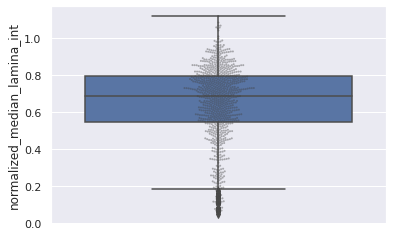

In [31]:
ax = sns.boxplot(y="normalized_median_lamina_int", data=all_data)
ax = sns.swarmplot(y="normalized_median_lamina_int", data=all_data, color=".25", alpha=0.4, size=2)

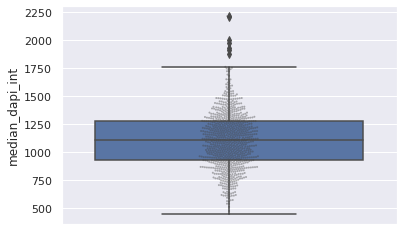

In [32]:
ax = sns.boxplot(y="median_dapi_int", data=all_data)
ax = sns.swarmplot(y="median_dapi_int", data=all_data, color=".25", alpha=0.4, size=2)